**HDS5210-2022 Final Project
By Chantel Coleman**

This analysis of market saturation and claim reimbursement data will dive into contributing factors from column specific information such as claims paid for testing, fee for service beneficiaries, and other columns.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
claims_df = pd.read_excel("Claims Reimbursement.xlsx", skiprows=[0])
market_df = pd.read_csv("Market Saturation.csv")

Creating a code to convert columns into integer datatypes since most of the columns in the Market Saturation file has integers.

In [16]:

def column_to_numeric(df, col):
    
    for i in df.index:
       
        if df[col][i].strip().replace(".","").replace(",","").isnumeric():
            df[col][i] = float(df[col][i].replace(",",""))
        else:
            df[col][i] = 0
    return df

Creating a code to get and process one column from both datasets and merge one based on state.

In [5]:
def get_merged(from_claims, from_market):
    
    claims_subset = claims_df[["State", from_claims]]
  
    claims_subset = claims_subset.sort_values("State").groupby(by="State", as_index=False).sum()
    
    
    market_subset = (market_df.loc[
            (market_df["county"]=="--ALL--") & 
            (market_df["aggregation_level"]=="STATE")
        ]
    [["state", from_market]])
    
    
    market_subset = column_to_numeric(market_subset, from_market)
    
   
    market_subset = (market_subset.sort_values("state").groupby(by="state", as_index=False).sum())
    
   
    market_subset.rename(columns = {'state':'State'}, inplace = True)
    
    
    merged_df = pd.merge(claims_subset, market_subset, how='inner', on = 'State')
    
     
    merged_df = merged_df.sort_values(from_market)

 
    return merged_df

This function will plot the relation between two columns. One column will be from the claims data set and the other column will be from the market saturation data set. 

In [14]:
def plot_line(from_claims, from_market, claims_label, market_label, title):
    
   
    df = get_merged(from_claims,from_market)
   
    plt.figure(figsize=(20, 8))
    
    
    plt.plot(df[from_market],  df[from_claims])
    
    plt.xlabel(market_label)
    
    plt.ylabel(claims_label)
    
    plt.title(title)
    plt.show();

The plot line function will show the relation between claims paid for testing from claims and number_of_fee_for_service_beneficiaries from market saturation based on states.

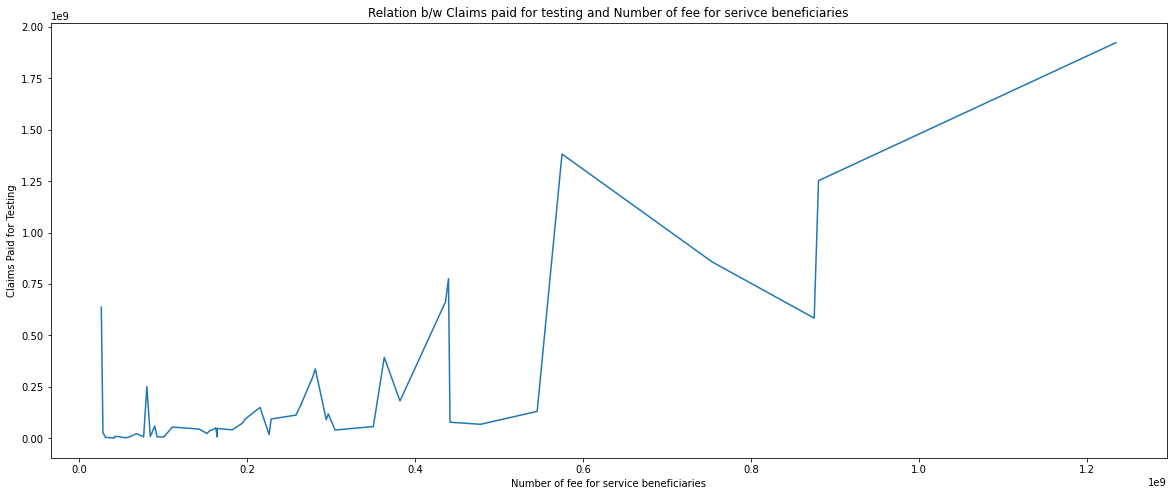

In [7]:
plot_line(
    from_claims = "Claims Paid for Testing",
    from_market = "number_of_fee_for_service_beneficiaries",
    claims_label = "Claims Paid for Testing",
    market_label = "Number of fee for service beneficiaries",
    title = "Relation b/w Claims paid for testing and Number of fee for serivce beneficiaries"
)

From the above line graph we can say that the claims paid for testing and number of free for service beneficaries is not strictly related but we can see that they are linked by the fact that, the higher the number of claims paid for testing the higher the number of free for service beneficiaries is likely to be.

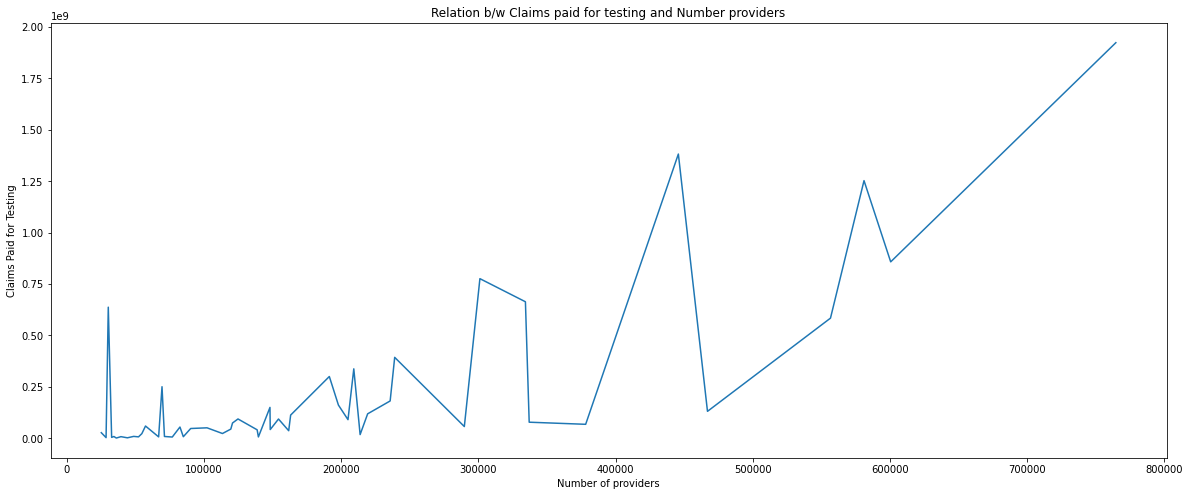

In [8]:
plot_line(
    from_claims = "Claims Paid for Testing",
    from_market = "number_of_providers",
    claims_label = "Claims Paid for Testing",
    market_label = "Number of providers",
    title = "Relation b/w Claims paid for testing and Number providers"
)

We can see from the above graph that after a certain point an increase in the number of providers does increase the Claims paid for testing.

Lets now check for the claims as a whole as there are claims paid for testing, treatment and vaccinations. Now we will aggregate the data in the claims dataset and create a new dataset.

In [15]:
claims_df = claims_df[["State", "Claims Paid for Testing", "Claims Paid for Treatment", "Claims Paid for Vaccine"]]

claims_df = claims_df.groupby("State", as_index=False).sum()

In [10]:
claims_df["Total Claims"] = claims_df["Claims Paid for Testing"] + claims_df["Claims Paid for Treatment"] + claims_df["Claims Paid for Vaccine"]

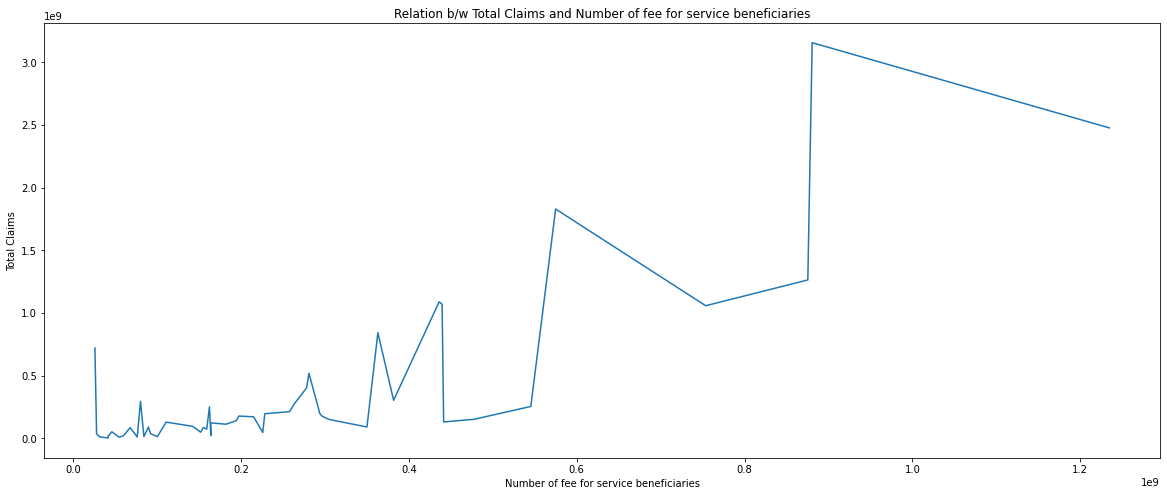

In [11]:
plot_line(
    from_claims = "Total Claims",
    from_market = "number_of_fee_for_service_beneficiaries",
    claims_label = "Total Claims",
    market_label = "Number of fee for service beneficiaries",
    title = "Relation b/w Total Claims and Number of fee for service beneficiaries"
)

Visually you can see that the total claims increase as the number of fee for service beneficiaries increase.

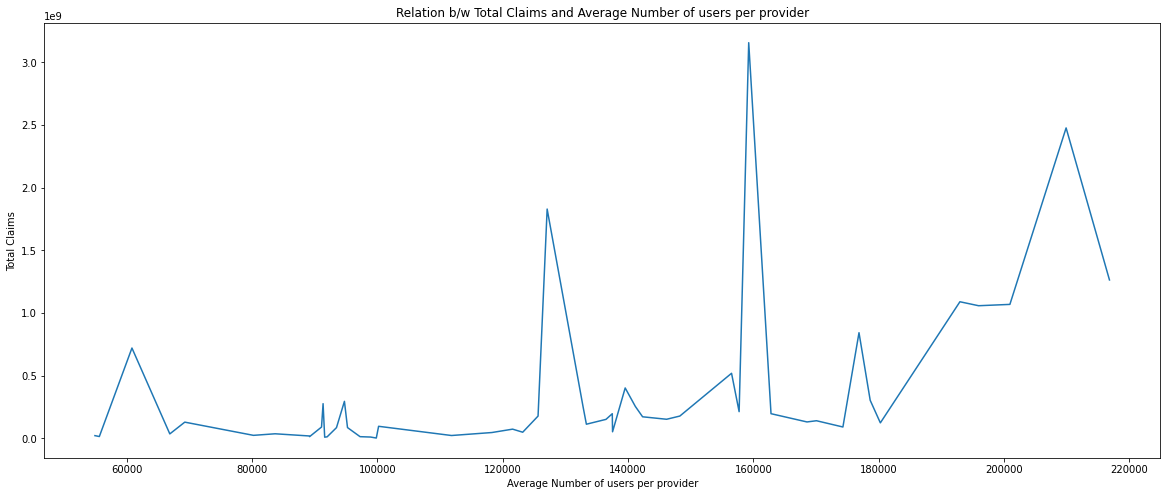

In [13]:
plot_line(
    from_claims = "Total Claims",
    from_market = "average_number_of_users_per_provider",
    claims_label = "Total Claims",
    market_label = "Average Number of users per provider",
    title = "Relation b/w Total Claims and Average Number of users per provider"
)

Lastly, you can see that the average number of users per provider does not show a pattern when plotted in relation with total claims.